In [108]:
import numpy as np
import pandas as pd
import hvplot.pandas
import sqlalchemy
from pathlib import Path
import plotly.express as px

code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [43]:
#Student Population Data
student_pop = pd.read_csv(
    Path("../uncc_project1/other_datasets/pop_of_school_kids.csv"))

student_pop = student_pop.dropna()
student_pop.tail()

#School Finance Data

state_school_fin = pd.read_csv(
    Path("../uncc_project1/School_Data/states.csv"))

state_school_fin= state_school_fin.drop('ENROLL', axis=1)
state_school_fin=state_school_fin.drop('OTHER_EXPENDITURE', axis=1)


database_connection_string = "sqlite://"

engine = sqlalchemy.create_engine(database_connection_string)

engine

school_db=state_school_fin.to_sql('school_finances', engine, index=False, if_exists='replace')

engine.table_names()

query_states_2016 = """
SELECT * 
FROM school_finances
WHERE YEAR = 2016
"""


finance_2016=pd.read_sql_query(query_states_2016, con=engine)


finance_2016["student_population"] = student_pop["pop_2016"]


query_top10_rev = """
SELECT * 
FROM school_finances
WHERE YEAR = 2016
ORDER BY TOTAL_REVENUE DESC
LIMIT 10
"""

C:\Users\Giselle\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:25: SADeprecationWarning:

The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)



In [44]:
top10_rev = pd.read_sql_query(query_top10_rev, con=engine).sort_values('TOTAL_REVENUE', ascending=False)


In [45]:
top10_graph = top10_rev[['STATE','TOTAL_REVENUE']].hvplot.bar(
    x='STATE',
    y='TOTAL_REVENUE',
    rot=45,
    yformatter='%.0f',
    ylim=[10000000,90000000],
    title='Top 10 States for School Revenue',
    ylabel='Total Revenue',
    xlabel=''
)

top10_graph

:Bars   [STATE]   (TOTAL_REVENUE)

In [46]:
query_bottom10_rev = """
SELECT * 
FROM school_finances
WHERE YEAR = 2016
ORDER BY TOTAL_REVENUE ASC
LIMIT 10
"""

bottom10_rev = pd.read_sql_query(query_bottom10_rev, con=engine)


In [47]:
bottom10_graph = bottom10_rev[['STATE','TOTAL_REVENUE']].hvplot.bar(
    x='STATE',
    y='TOTAL_REVENUE',
    rot=45,
    yformatter='%.0f',
    ylim=[500000,2600000],
    title='Bottom 10 States for School Revenue',
    ylabel='Total Revenue',
    xlabel=''
) 
bottom10_graph

:Bars   [STATE]   (TOTAL_REVENUE)

In [109]:
#Comparing School Finance Data w/ Drug Abuse and Mental Health data 2015 to 2016
alcoholism_2016 = pd.read_csv(
    Path("../uncc_project1/other_datasets/drug_abuse_data/alcoholism_2016.csv"))
alcoholism_2016.loc[:, "12-17 Estimate"] = alcoholism_2016.loc[:, "12-17 Estimate"].str.replace("%", "")
alcoholism_2016=alcoholism_2016.drop([0,1,2,3,4])

alcoholism_2016=alcoholism_2016.reset_index(drop=True)

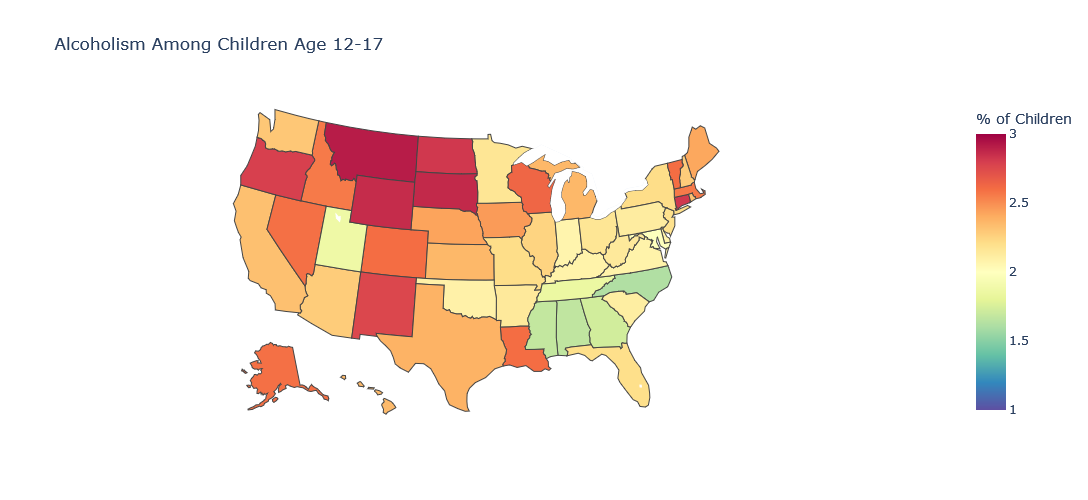

In [49]:
alcoholism_2016['Code'] = alcoholism_2016['State'].map(code)
fig = px.choropleth(alcoholism_2016,
                    locations='Code',
                    color= alcoholism_2016['12-17 Estimate'].astype(float),
                    range_color=[1,3],
                    color_continuous_scale='spectral_r',
                    hover_name='State',
                    locationmode='USA-states',
                    title="Alcoholism Among Children Age 12-17",
                    scope='usa',
                    width=700,
                    height=500,
                   )
fig.update_layout(coloraxis_colorbar=dict(
    title="% of Children"))
fig= fig.update_layout(margin_l=5)
fig=fig.update_layout(margin_r=10)
fig

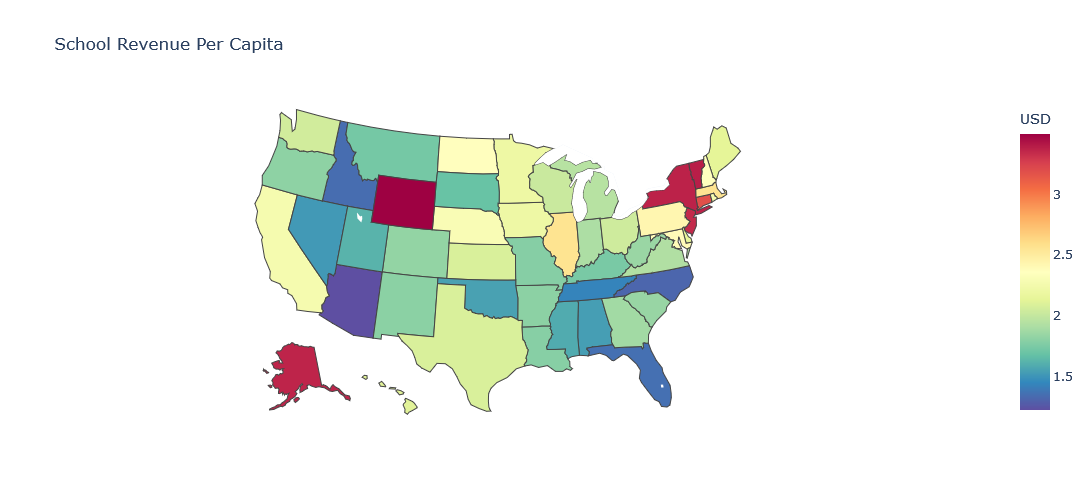

In [50]:
#Add per capita row

finance_2016= pd.DataFrame(finance_2016)

finance_2016["rev_per_capita"]=finance_2016["TOTAL_REVENUE"]/finance_2016["student_population"]

finance_2016


#Funding per capita heat map

finance_2016['Code'] = finance_2016['STATE'].map(code)
fig = px.choropleth(finance_2016,
                    locations='Code',
                    color= finance_2016['rev_per_capita'].astype(float),
                    color_continuous_scale='spectral_r',
                    hover_name='STATE',
                    locationmode='USA-states',
                    title="School Revenue Per Capita",
                    scope='usa',
                    width=700,
                    height=500,
                   )
fig.update_layout(coloraxis_colorbar=dict(
    title="USD"))
fig= fig.update_layout(margin_l=5)
fig_finance_heat=fig.update_layout(margin_r=10)
fig_finance_heat

In [51]:
#Major Depressive Episodes
depressive_2016 = pd.read_csv(
    Path("../uncc_project1/other_datasets/drug_abuse_data/major_depressive_episode_2016.csv"))


In [52]:
depressive_2016.loc[:,"12-17 Estimate"] = depressive_2016.loc[:,"12-17 Estimate"].str.replace("%", "")


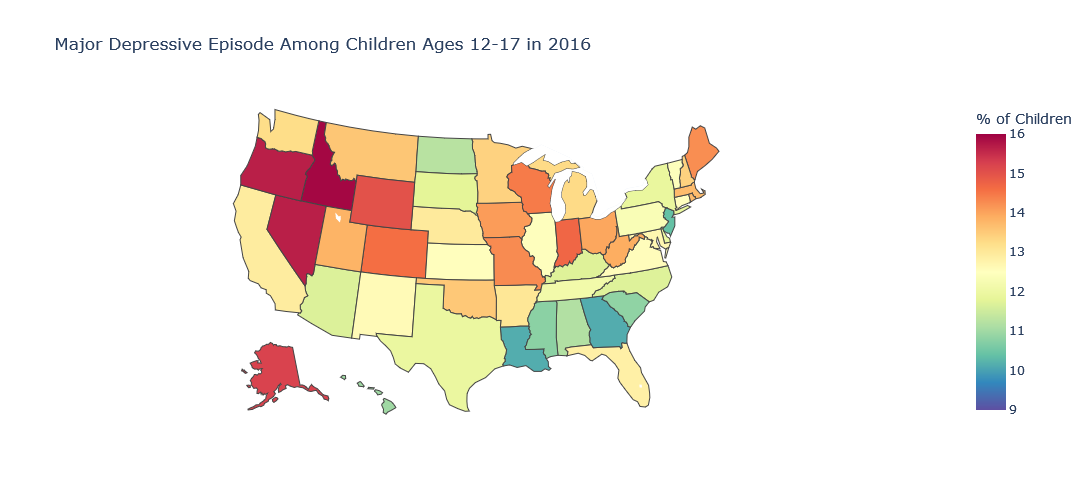

In [53]:
#Heat Map
depressive_2016['Code'] = depressive_2016['State'].map(code)
depressive_fig = px.choropleth(depressive_2016,
                    locations='Code',
                    color= depressive_2016['12-17 Estimate'].astype(float),
#                     range_color=[1,3],
                    color_continuous_scale='spectral_r',
                    hover_name='State',
                    locationmode='USA-states',
                    range_color=[9,16],
                    title="Major Depressive Episode Among Children Ages 12-17 in 2016",
                    scope='usa',
                    width=700,
                    height=500,
                   )
depressive_fig.update_layout(coloraxis_colorbar=dict(
    title="% of Children"))
depressive_fig= depressive_fig.update_layout(margin_l=5)
depressive_fig= depressive_fig.update_layout(margin_r=10)
depressive_fig

In [54]:
alc_fin_corr= finance_2016["TOTAL_REVENUE"].astype(float).corr(alcoholism_2016["12-17 Estimate"].astype(float), method='pearson')
alc_fin_corr

-0.1276872003045753

In [59]:
fin_alc=pd.DataFrame(alcoholism_2016["12-17 Estimate"])
fin_alc["total_revenue"]=finance_2016["TOTAL_REVENUE"]
fin_alc["state"]=alcoholism_2016["State"]
fin_alc.head()

,12-17 Estimate,total_revenue,state
0,1.67,7498567,Alabama
1,2.59,2494691,Alaska
2,2.28,8503034,Arizona
3,2.14,5401016,Arkansas
4,2.33,89217262,California


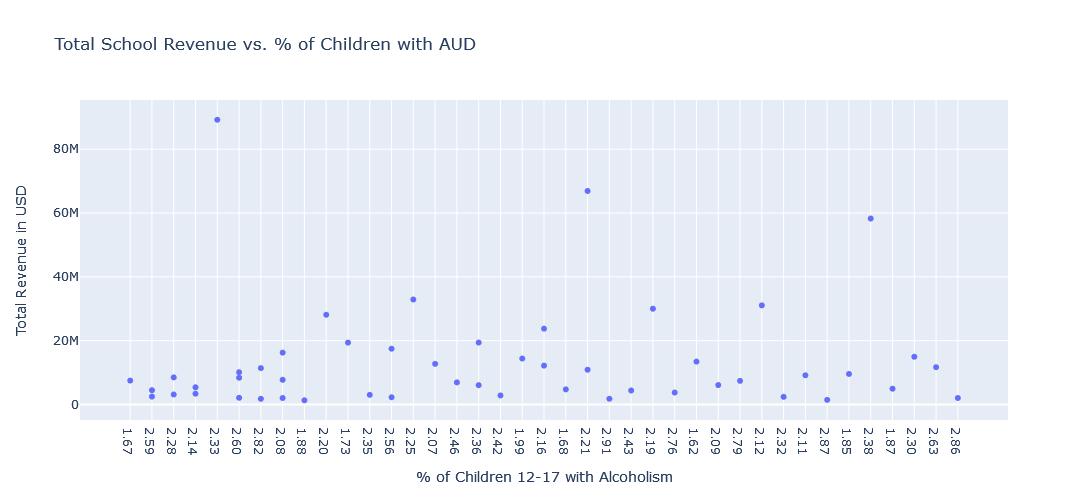

In [110]:
fig= px.scatter(fin_alc,
    y="total_revenue",
    x="12-17 Estimate",
#     yformatter="%0f",
#     rot=45,
    height=500,
    width=1000,
    labels={"total_revenue":"Total Revenue in USD","12-17 Estimate": "% of Children 12-17 with Alcoholism"},
    hover_data={'state'},
#     hover_cols="state",
    title="Total School Revenue vs. % of Children with AUD")
fig